In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # For better tick formatting

def load_data_from_json(json_file):
    """
    Loads data from a JSON file into numpy arrays.

    Args:
        json_file (str): Path to the JSON file.

    Returns:
        dict: A dictionary containing the data as numpy arrays.
              Returns None if there's an error.
    """
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)

        bond_lengths = np.array(data['input_data']['bond_lengths'])
        e0 = np.array(data['properties']['energies']['E0'])
        e1 = np.array(data['properties']['energies']['E1'])
        e2 = np.array(data['properties']['energies']['E2'])

        return {
            "bond_lengths": bond_lengths,
            "E0": e0,
            "E1": e1,
            "E2": e2
        }

    except FileNotFoundError:
        print(f"Error: File '{json_file}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{json_file}'.")
        return None
    except KeyError as e:
        print(f"Error: Missing key '{e.args[0]}' in JSON data.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


def create_energy_plot(data, output_filename="energy_vs_bondlength.png",
                        title="Energy vs. Bond Length",
                        colors=['red', 'blue', 'green'],
                        linestyles=['-', '--', ':'],
                        markers=['o', 's', '^']):
    """
    Creates a publication-quality plot of energies vs. bond length.

    Args:
        data (dict): Dictionary containing bond_lengths and energies.
        output_filename (str, optional): Filename to save the plot.
        title (str, optional): Title of the plot.
        colors (list, optional): List of colors for each energy state.
        linestyles (list, optional): List of line styles.
        markers (list, optional): List of markers.
    """

    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size for better quality

    #ax.plot(data['bond_lengths'], data['E0'], label='E0 (Ground State)',
    #        color=colors[0], linestyle=linestyles[0], marker=markers[0])
    ax.plot(data['bond_lengths'], data['E1'], label='E1 (First Excited)',
            color=colors[1], linestyle=linestyles[1], marker=markers[1])
    ax.plot(data['bond_lengths'], data['E2'], label='E2 (Second Excited)',
            color=colors[2], linestyle=linestyles[2], marker=markers[2])

    ax.set_xlabel("Bond Length (Angstrom)", fontsize=14)
    ax.set_ylabel("Energy (Hartree)", fontsize=14)
    ax.set_title(title, fontsize=16)

    ax.legend(fontsize=12)

    # Improve tick appearance
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', direction='out', length=6, width=1, grid_alpha=0.3)  # Ticks outside, length, etc.
    ax.grid(True, alpha=0.3)  # Add a light grid

    # Adjust layout to prevent labels from being cut off
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)  # Save as high-resolution PNG
    plt.show()




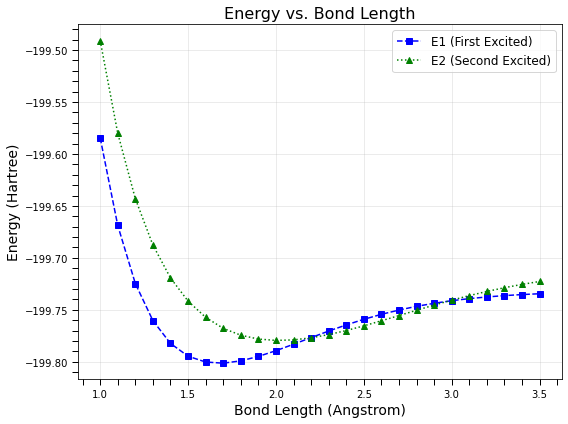

In [2]:


cavity_free_json_file = "mghplus_dmrg_ccpVDZ.json"  # Replace with your JSON filename
cavity_med_json_file = "mghplus_dmrg_ccpVDZ_lz_0p01_om_0.136.json"
cavity_str_json_file = "mghplus_dmrg_ccpVDZ_lz_0p05_om_0.136.json"

plot_file = "mghplus_dmrg_ccpVDZ.png"


cavity_free_data = load_data_from_json(cavity_free_json_file)
medium_cav_data = load_data_from_json(cavity_med_json_file)
strong_cav_data = load_data_from_json(cavity_str_json_file)


if cavity_free_data:
    create_energy_plot(cavity_free_data, output_filename=plot_file)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def create_multi_energy_plots(data_list,
                               output_prefix="energy_vs_bondlength",
                               titles=["All States", "E0 Only", "E1 Only", "E2 Only"],
                               colors=['red', 'blue', 'green'],
                               linestyles=['-', '--', ':'],
                               markers=['o', 's', '^']):
    """
    Creates four plots comparing energy vs. bond length from multiple datasets.

    Args:
        data_list (list): List of three dictionaries, each with keys: 'bond_lengths', 'E0', 'E1', 'E2'.
        output_prefix (str): Prefix for saved output file names.
        titles (list): Titles for the four plots.
        colors (list): Colors to distinguish E0, E1, E2.
        linestyles (list): Linestyles to distinguish datasets.
        markers (list): Markers to distinguish datasets.
    """

    assert len(data_list) == 3, "You must pass exactly three data dictionaries."

    # Plot 1: All energy levels from each dataset
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, data in enumerate(data_list):
        ax.plot(data['bond_lengths'], data['E0'], label=f'Dataset {i+1} - E0',
                color=colors[0], linestyle=linestyles[i], marker=markers[i])
        ax.plot(data['bond_lengths'], data['E1'], label=f'Dataset {i+1} - E1',
                color=colors[1], linestyle=linestyles[i], marker=markers[i])
        ax.plot(data['bond_lengths'], data['E2'], label=f'Dataset {i+1} - E2',
                color=colors[2], linestyle=linestyles[i], marker=markers[i])
    _finalize_plot(ax, titles[0])
    plt.savefig(f"{output_prefix}_all_states.png", dpi=300)
    plt.show()

    # Plots 2–4: One energy level at a time
    for j, energy_key in enumerate(['E0', 'E1', 'E2']):
        fig, ax = plt.subplots(figsize=(8, 6))
        for i, data in enumerate(data_list):
            ax.plot(data['bond_lengths'], data[energy_key],
                    label=f'Dataset {i+1}', linestyle=linestyles[i],
                    marker=markers[i], color=colors[j])
        _finalize_plot(ax, titles[j+1], ylabel="Energy (Hartree)")
        plt.savefig(f"{output_prefix}_{energy_key}.png", dpi=300)
        plt.show()


def _finalize_plot(ax, title, xlabel="Bond Length (Angstrom)", ylabel="Energy (Hartree)"):
    """Helper to style and finalize plots."""
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(fontsize=12)

    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', direction='out', length=6, width=1)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()


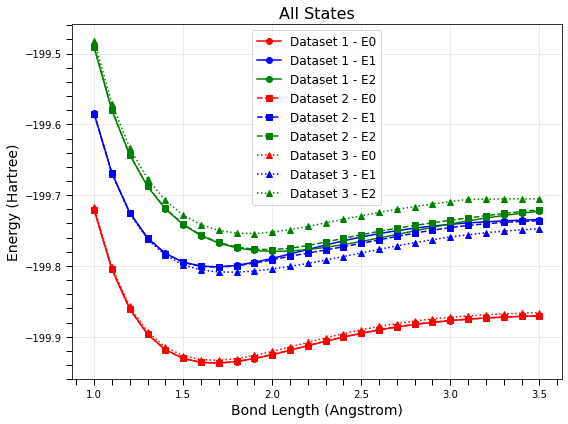

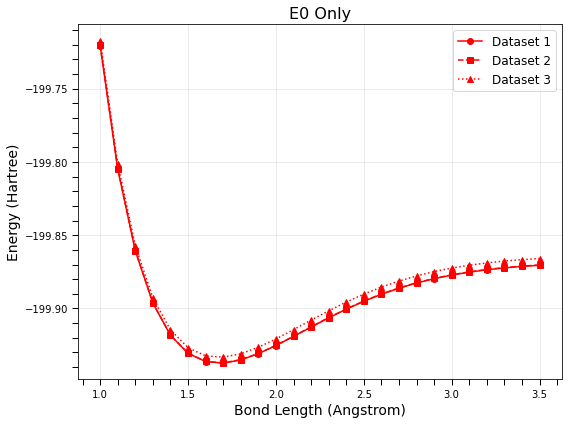

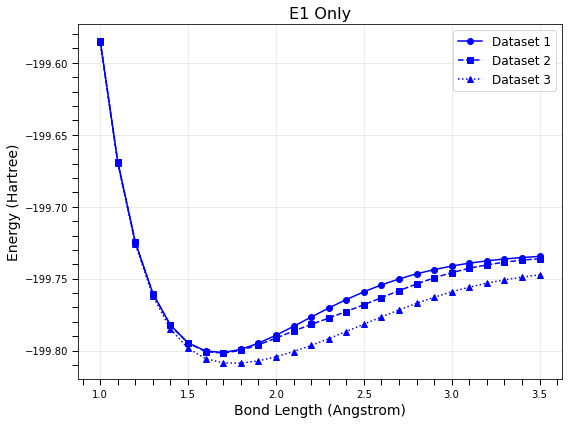

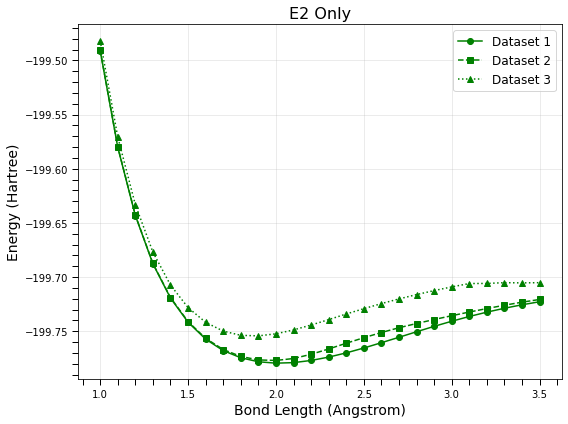

In [4]:
cavity_free_data = load_data_from_json(cavity_free_json_file)
medium_cav_data = load_data_from_json(cavity_med_json_file)
strong_cav_data = load_data_from_json(cavity_str_json_file)

create_multi_energy_plots([cavity_free_data, medium_cav_data, strong_cav_data])